In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib as mpl


In [2]:
#load the first sheet of aggregationV3
df=pd.read_csv("Aggregation.csv")
df=df[:442].copy()

SF indicators:

In [3]:
SFindic=["MIR_Cpt_Fraction","Cpt_HII_region","FUV_Sources","Optical_Cluster","Diffuse_HII_Fraction"]

In [4]:
df.columns

Index(['GMC Number', 'Round', 'Optical_Cluster', 'FUV_Sources',
       'MIR_Cpt_Source', 'Cpt_HII_region', 'Diffuse_HII', 'N_Classifiers',
       'Round_Fraction', 'MIR_Cpt_Fraction', 'Diffuse_HII_Fraction',
       'err_Optical_Cluster', 'err_FUV_Sources', 'err_Cpt_HII_region',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'CLOUDNUM', 'RA', 'DEC',
       'VLSR', 'RA_MAXPIX', 'DEC_MAXPIX', 'VLSR_MAXPIX', 'RGAL_KPC', 'NPIX',
       'S2N', 'TMAX_K', 'FLUX_KKMS_PC2', 'SIGV_KMS', 'MOMMAJ_PC', 'MOMMIN_PC',
       'MOMMIN_NODC_PC', 'POSANG', 'PA_DC', 'FWHM_MIN_DC', 'FWHM_MAJ_DC',
       'RAD_PC', 'RAD_NODC_NOEX', 'ALPHA_CO', 'MLUM_MSUN', 'MVIR_MSUN',
       'RAD3D_PC', 'PRESSURE', 'TFF_MYR', 'SURFDENS', 'SIGMA0SQ', 'VIRPARAM',
       'ECCEN', 'RADIOSNR', 'RADIOHII', 'HST_AV'],
      dtype='object')

In [ ]:
np.where(df["FUV"])

## Correlation plots b/w SF indicators

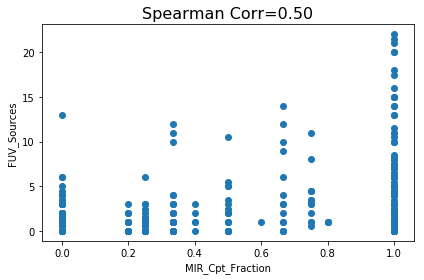

In [5]:
xlab=SFindic[0]
ylab=SFindic[2]

xs="linear"
ys="linear"

nanfilt=(df[xlab]=='#NUM!')|(df[ylab]=='#NUM!')
x=np.array(df[xlab][~nanfilt],dtype=float)
y=np.array(df[ylab][~nanfilt],dtype=float)
plt.figure()
plt.title("Spearman Corr={:.2f}".format(stats.spearmanr(x,y)[0]),fontsize=16)
plt.scatter(x,y)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.xscale(xs)
plt.yscale(ys)
plt.tight_layout()
# plt.savefig("X_"+xlab+"_Y_"+ylab+".png")
plt.show()
plt.close()

## Evolution Stage Classification

In [4]:
#somehow there are many "#NUM!" in "Optical_Cluster", get rid of these
df=df[df["Optical_Cluster"]!="#NUM!"]
len(df)

435

In [7]:
# np.array(df["MIR_Cpt_Fraction"],dtype=float)

In [5]:
binaryThresh=0.2

numThresh=1

MIRfracThresh=binaryThresh
diffHIIThresh=binaryThresh

cptHIIThresh=numThresh
fuvThresh=numThresh
clsThresh=numThresh



nothingFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)<MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)

embFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)>=MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)

earlyFilt=(~nothingFilt)&(~embFilt)&(np.array(df["Optical_Cluster"],dtype=float)<clsThresh)


lateFilt=(~nothingFilt)&(~embFilt)&(~earlyFilt)
# &\
#             ((np.array(df["Optical_Cluster"],dtype=float)>0.8)|(np.array(df["Diffuse_HII_Fraction"],dtype=float)>noThresh))

print(np.sum(nothingFilt))
print(np.sum(embFilt))
print(np.sum(earlyFilt))
print(np.sum(lateFilt))
print(np.sum(nothingFilt),np.sum(nothingFilt),np.sum(earlyFilt)+np.sum(lateFilt))
print(np.sum(nothingFilt)+np.sum(embFilt)+np.sum(earlyFilt)+np.sum(lateFilt))


69
60
96
210
69 69 306
435


In [11]:
df["GMC Number"][nothingFilt]

1        3.0
7        9.0
9       11.0
11      13.0
14      16.0
16      18.0
21      23.0
26      28.0
28      30.0
34      36.0
35      37.0
48      50.0
56      58.0
69      71.0
74      76.0
84      86.0
89      91.0
91      93.0
93      95.0
110    112.0
130    132.0
141    143.0
146    148.0
150    152.0
151    153.0
169    171.0
214    216.0
220    222.0
222    224.0
230    232.0
232    234.0
233    235.0
239    241.0
245    247.0
247    249.0
249    251.0
257    259.0
262    264.0
263    265.0
272    274.0
273    275.0
285    287.0
289    291.0
297    299.0
303    305.0
315    317.0
317    319.0
324    326.0
328    330.0
331    333.0
334    336.0
354    356.0
382    384.0
414    416.0
415    417.0
436    438.0
Name: GMC Number, dtype: float64

In [9]:
df["GMC Number"][embFilt]

15      17.0
46      48.0
49      51.0
205    207.0
266    268.0
269    271.0
287    289.0
294    296.0
304    306.0
341    343.0
350    352.0
367    369.0
404    406.0
410    412.0
419    421.0
420    422.0
432    434.0
440    442.0
441    443.0
Name: GMC Number, dtype: float64

## Mass function plots


In [10]:
binaryThresh=0.2

numThresh=1

MIRfracThresh=binaryThresh
diffHIIThresh=binaryThresh

cptHIIThresh=numThresh
fuvThresh=numThresh
clsThresh=numThresh



nothingFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)<MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)

embFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)>=MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)
earlyFilt=(~nothingFilt)&(~embFilt)&(np.array(df["Optical_Cluster"],dtype=float)<clsThresh)


lateFilt=(~nothingFilt)&(~embFilt)&(~earlyFilt)
# &\
#             ((np.array(df["Optical_Cluster"],dtype=float)>0.8)|(np.array(df["Diffuse_HII_Fraction"],dtype=float)>noThresh))

print(np.sum(nothingFilt))
print(np.sum(embFilt))
print(np.sum(earlyFilt))
print(np.sum(lateFilt))
print(np.sum(nothingFilt),np.sum(nothingFilt),np.sum(earlyFilt)+np.sum(lateFilt))
print(np.sum(nothingFilt)+np.sum(embFilt)+np.sum(earlyFilt)+np.sum(lateFilt))


69
60
96
210
69 69 306
435


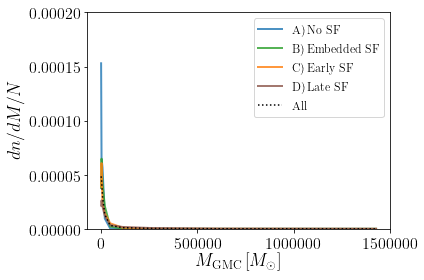

In [11]:
plt.rcParams["text.usetex"]=True
# plt.rcParams["xtick.direction"]="in"
# plt.rcParams["ytick.direction"]="in"
plt.rcParams["axes.labelsize"]=18
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

plt.figure(figsize=(6,4))

bins=np.logspace(3,6.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

cDict={"A":"tab:blue","B":"tab:green","C":"tab:orange","D":"tab:brown"}

n,_=np.histogram(df["MLUM_MSUN"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label=r"$\rm A) \, No \ SF$",alpha=0.8,c=cDict["A"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label=r"$\rm B) \, Embedded \ SF$",alpha=0.8,c=cDict["B"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label=r"$\rm C) \, Early \ SF$",alpha=0.8,c=cDict["C"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label=r"$\rm D) \, Late \ SF$",alpha=0.8,c=cDict["D"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"],bins)
plt.plot(binc,n/len(df)/binw,label=r"$\rm All$",c='k',ls=":",alpha=1)

plt.ylim(5e-8,2e-4)

plt.legend(fontsize=12)
# plt.xscale("log")
# plt.yscale("log")
# plt.ylim(1e-7,5e-5)
plt.xlabel(r"$M_{\rm GMC} \, [M_\odot]$")
# plt.ylabel(r"${\rm PDF } \ ({dn}/{N/ dM})$")
plt.ylabel(r"$dn/dM/N$")
plt.tight_layout()
# plt.savefig("drive/MyDrive/mass_PDF.pdf")


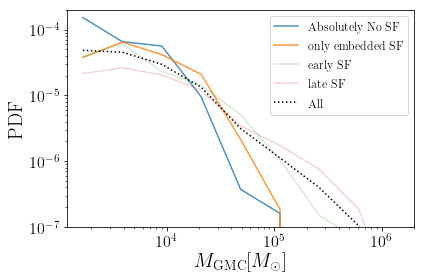

In [9]:
mpl.rcParams["text.usetex"]=True
mpl.rcParams["axes.labelsize"]=20
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16

# plt.style.use("mypresentation")

bins=np.logspace(3,6.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

whichM=df["MLUM_MSUN"]

n,_=np.histogram(whichM[nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label=r"$\rm Absolutely \ No \ SF$",alpha=0.8)

n,_=np.histogram(whichM[embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label=r"$\rm only \ embedded \ SF$",alpha=0.8)

n,_=np.histogram(whichM[earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label=r"$\rm early \ SF$",alpha=0.2)


n,_=np.histogram(whichM[lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label=r"$\rm late \ SF$",alpha=0.2)

n,_=np.histogram(whichM,bins)
plt.plot(binc,n/len(df)/binw,label=r"$\rm All$",c='k',ls=":",alpha=1)

allSlpData=n/len(df)/binw


plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{\rm GMC} [M_\odot] \rm $")
plt.ylabel(r"$\rm PDF$")
plt.tight_layout()


In [69]:
import emcee

from scipy.optimize import minimize

import corner

def log_likelihood(theta, x, y, yerr):
    alpha,b = theta
    model = alpha*x+b
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((y - model) ** 2 / sigma2)


bins=np.logspace(4,7,20)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

n,_=np.histogram(whichM,bins)
allSlpData=n/len(df)/binw

x=np.log10(binc)
y=np.log10(allSlpData)
yerr=np.ones_like(x)

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([-1,-1]) 
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml = soln.x
print(m_ml,b_ml)

-1.0 -1.0


/Users/hqchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


In [73]:
df["MLUM_MSUN"].max()

1037117.026

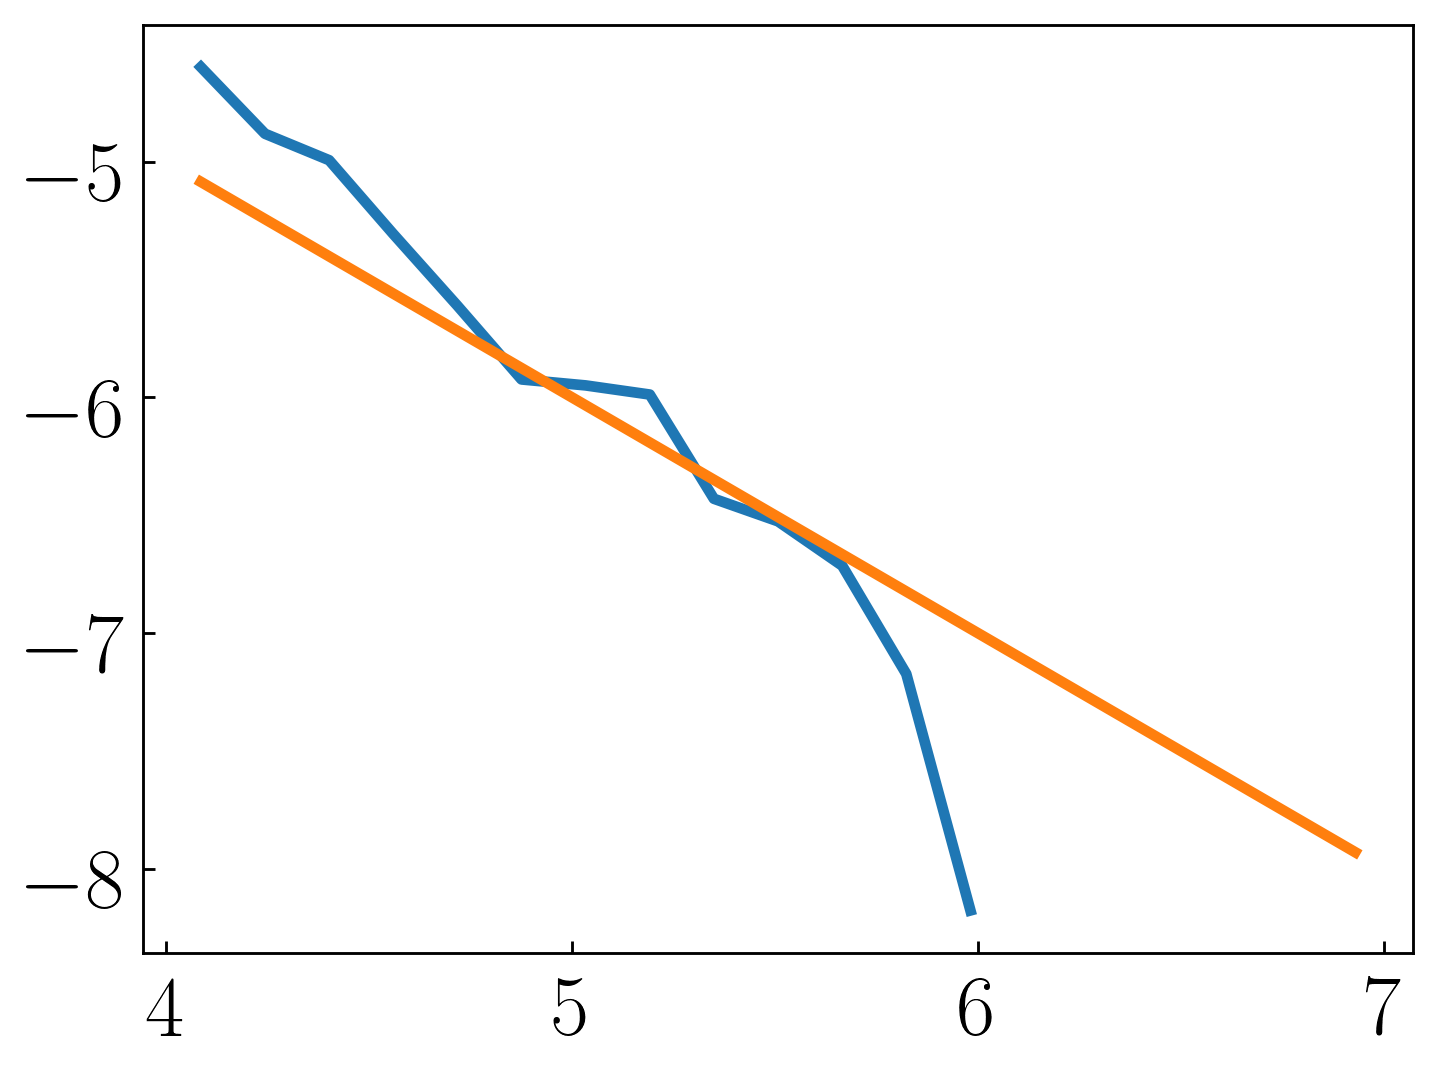

In [71]:

plt.plot(x,y)
plt.plot(x,m_ml*x+b_ml)


In [52]:

print(stats.ks_2samp(df["MLUM_MSUN"], df["MLUM_MSUN"][nothingFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"], df["MLUM_MSUN"][embFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"][nothingFilt], df["MLUM_MSUN"][embFilt]))

# plt.xscale("log")

Ks_2sampResult(statistic=0.33477011494252873, pvalue=1.9219961946664123e-05)
Ks_2sampResult(statistic=0.23520871143375677, pvalue=0.23160791336947828)
Ks_2sampResult(statistic=0.2716165413533835, pvalue=0.20796889527418597)


## extinction plots

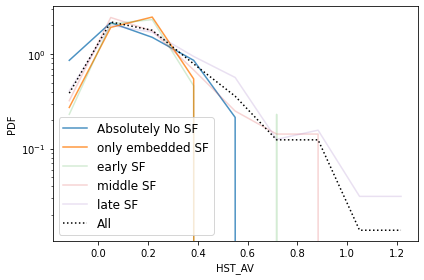

In [ ]:
bins=np.linspace(-0.2,1.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]


n,_=np.histogram(df["HST_AV"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label="Absolutely No SF",alpha=0.8)

n,_=np.histogram(df["HST_AV"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label="only embedded SF",alpha=0.8)

n,_=np.histogram(df["HST_AV"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label="early SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"][midFilt],bins)
plt.plot(binc,n/np.sum(midFilt)/binw,label="middle SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label="late SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"],bins)
plt.plot(binc,n/len(df)/binw,label="All",c='k',ls=":",alpha=1)


# plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("HST_AV")
plt.ylabel("PDF")
plt.tight_layout()
# plt.savefig("noSF_dust_PDF.png")

## GMC mass vs extinction

SpearmanrResult(correlation=0.3511111111111111, pvalue=0.07861852220819182)


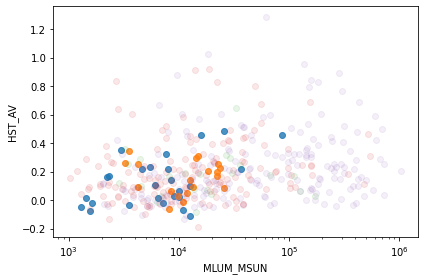

In [ ]:
plt.scatter(df["MLUM_MSUN"][nothingFilt],df["HST_AV"][nothingFilt],label="Absolutely No SF",alpha=0.8)
print(stats.spearmanr(df["MLUM_MSUN"][nothingFilt][np.isnan(df["HST_AV"][nothingFilt])==False],df["HST_AV"][nothingFilt][np.isnan(df["HST_AV"][nothingFilt])==False]))
plt.scatter(df["MLUM_MSUN"][embFilt],df["HST_AV"][embFilt],label="embedded SF",alpha=0.8)
plt.scatter(df["MLUM_MSUN"][earlyFilt],df["HST_AV"][earlyFilt],label="early SF",alpha=0.1)
plt.scatter(df["MLUM_MSUN"][midFilt],df["HST_AV"][midFilt],label="middle SF",alpha=0.1)
plt.scatter(df["MLUM_MSUN"][lateFilt],df["HST_AV"][lateFilt],label="late SF",alpha=0.1)

plt.xlabel("MLUM_MSUN")
plt.ylabel("HST_AV")
plt.xscale("log")
plt.tight_layout()
# plt.savefig("Mass_AV.png")

## Shape filter

In [ ]:
floatRF=np.array(df["Round_Fraction"],dtype=float)
round1Filt=(floatRF==1)
relaRoundFilt=(floatRF>0.5)
relaFilaFilt=(floatRF<0.5)
round0Filt=(floatRF==0)

## Dispersal mechanism

In [ ]:
df.columns

Index(['GMC Number', 'Round', 'Optical_Cluster', 'FUV_Sources',
       'MIR_Cpt_Source', 'Cpt_HII_region', 'Diffuse_HII', 'N_Classifiers',
       'Round_Fraction', 'MIR_Cpt_Fraction', 'Diffuse_HII_Fraction',
       'err_Optical_Cluster', 'err_FUV_Sources', 'err_Cpt_HII_region',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'CLOUDNUM', 'RA', 'DEC',
       'VLSR', 'RA_MAXPIX', 'DEC_MAXPIX', 'VLSR_MAXPIX', 'RGAL_KPC', 'NPIX',
       'S2N', 'TMAX_K', 'FLUX_KKMS_PC2', 'SIGV_KMS', 'MOMMAJ_PC', 'MOMMIN_PC',
       'MOMMIN_NODC_PC', 'POSANG', 'PA_DC', 'FWHM_MIN_DC', 'FWHM_MAJ_DC',
       'RAD_PC', 'RAD_NODC_NOEX', 'ALPHA_CO', 'MLUM_MSUN', 'MVIR_MSUN',
       'RAD3D_PC', 'PRESSURE', 'TFF_MYR', 'SURFDENS', 'SIGMA0SQ', 'VIRPARAM',
       'ECCEN', 'RADIOSNR', 'RADIOHII', 'HST_AV'],
      dtype='object')

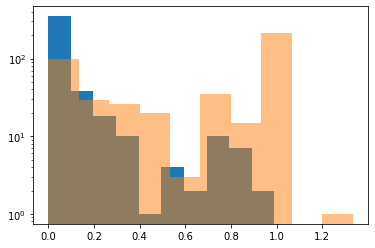

In [ ]:
plt.hist(np.array(df["RADIOSNR"],dtype=float))
plt.hist(np.array(df["Diffuse_HII_Fraction"],dtype=float),alpha=0.5)
plt.yscale("log")
plt.show()

In [ ]:
df["Diffuse_HII_Fraction"][np.array(df["Diffuse_HII_Fraction"],dtype=float)>1]

40    1.333333333
Name: Diffuse_HII_Fraction, dtype: object

(array([ 99.,  29.,  26.,  20.,   3.,  35.,  15., 214.,   0.,   1.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333]),
 <a list of 10 Patch objects>)

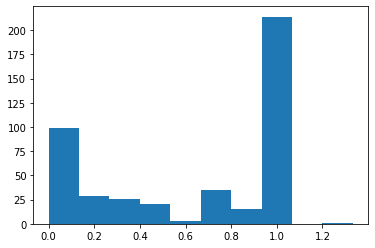

In [ ]:
plt.hist(arr)